<a href="https://colab.research.google.com/github/efbodethomas/covid-cnn/blob/main/covid_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install split-folders
# !pip install opencv-python
# !pip install tensorflow
# !unzip ''

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, RandomFlip, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

%matplotlib inline

### Importing the files from folders

In [ ]:
files_for_normal = glob.glob('/content/drive/MyDrive/Deep Learning Assessment/DMV_Assess_1_Covid-19_Dataset/Normal/*.*', 
                   recursive = True)

files_for_covid = glob.glob('/content/drive/MyDrive/Deep Learning Assessment/DMV_Assess_1_Covid-19_Dataset/Covid-19/*.*', 
                   recursive = True)


#### Moving the files into list, Normal and Covid images are appended in the list 'x', while their corresponding labels are appended in the list, 'y'. 
## Label '0' for Normal images, Label '1' for Covid images.



In [ ]:
x = []
y = []

for file in files_for_normal:
    img = cv2.imread(file, 1)
    img = cv2.resize(img, (224,224))
    x.append(img)
    y.append(0)

for file in files_for_covid:
    img = cv2.imread(file, 1)
    img = cv2.resize(img, (224,224))
    x.append(img)
    y.append(1)

### Normalising the data in the lists

In [ ]:
x = np.array(x) / 255
y = np.array(y)

In [ ]:
print('Shape of training images:' ,x.shape)

Shape of training images: (200, 224, 224, 3)


### Splitting the dataset into Training and Testing Sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.dtype

dtype('float64')

## Visualising the Data

<function matplotlib.pyplot.show>

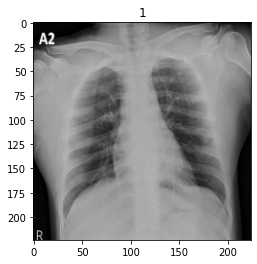

In [ ]:
random_number = random.randint(1, len(x_train))
plt.imshow(x_train[random_number])
plt.title(y_train[random_number])
plt.show

## Building the Model

In [ ]:
model = Sequential([
    Conv2D(filters=16, input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(),
    Conv2D(filters=32, input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(),
    Conv2D(filters=32, input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

## Determining the optimiser and learning rate 

## Displaying the Summary

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 32)     

In [ ]:
train = model.fit(x=x,y=y,batch_size=10,validation_split= 0.2,epochs=40,verbose=1)

Epoch 1/40
16/16 [==============================] - 2s 47ms/step - loss: 0.5687 - accuracy: 0.6687 - val_loss: 0.4015 - val_accuracy: 1.0000
Epoch 2/40
16/16 [==============================] - 1s 32ms/step - loss: 0.3593 - accuracy: 0.8438 - val_loss: 0.4542 - val_accuracy: 0.8250
Epoch 3/40
16/16 [==============================] - 1s 32ms/step - loss: 0.2284 - accuracy: 0.8875 - val_loss: 0.5639 - val_accuracy: 0.7250
Epoch 4/40
16/16 [==============================] - 1s 33ms/step - loss: 0.2094 - accuracy: 0.8938 - val_loss: 0.1522 - val_accuracy: 0.9500
Epoch 5/40
16/16 [==============================] - 1s 33ms/step - loss: 0.1440 - accuracy: 0.9500 - val_loss: 0.2159 - val_accuracy: 0.9000
Epoch 6/40
16/16 [==============================] - 1s 33ms/step - loss: 0.0931 - accuracy: 0.9688 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 7/40
16/16 [==============================] - 1s 33ms/step - loss: 0.1223 - accuracy: 0.9500 - val_loss: 0.0998 - val_accuracy: 0.9750
Epoch 8/40
16

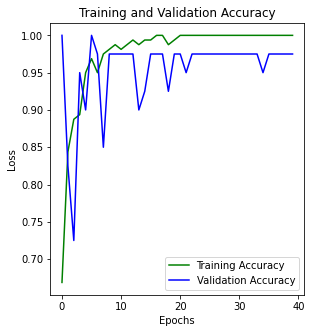

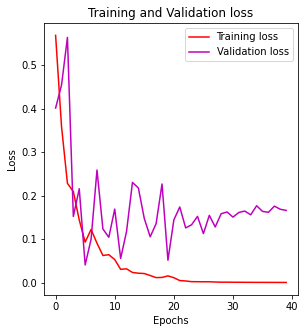

In [ ]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']

loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'm', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 1.0000


[0.002340473234653473, 1.0]

In [ ]:
pred = model.predict(x_test) > 0.5
print(pred)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]]


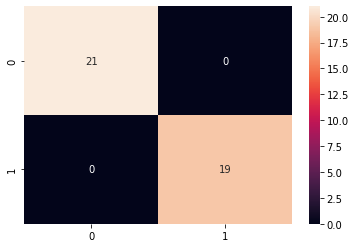

In [ ]:
import seaborn as sns
confusion_mat = confusion_matrix(pred, y_test)
sns.heatmap(confusion_mat, annot=True)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Adding Data Augmentation to the Model

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)]
)

In [ ]:
model1 = Sequential([
    data_augmentation,
    Conv2D(filters=16, input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(),
    Conv2D(filters=32, input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(),
    Conv2D(filters=32, input_shape=(224,224,3), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.03)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

## Implementing early stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'accuracy',
    patience = 5
)

Training the model with data augmentation and adding earlystopping.

In [ ]:
train1 = model1.fit(x=x,
          y=y,
          batch_size=10,
          validation_split= 0.2,
          epochs=40,
          callbacks=[callback],
          verbose=1    
        )

Epoch 1/40
16/16 [==============================] - 2s 48ms/step - loss: 0.6821 - accuracy: 0.6313 - val_loss: 1.2943 - val_accuracy: 0.0000e+00
Epoch 2/40
16/16 [==============================] - 1s 35ms/step - loss: 0.5759 - accuracy: 0.7250 - val_loss: 1.4614 - val_accuracy: 0.0000e+00
Epoch 3/40
16/16 [==============================] - 1s 35ms/step - loss: 0.5221 - accuracy: 0.6875 - val_loss: 0.7773 - val_accuracy: 0.5750
Epoch 4/40
16/16 [==============================] - 1s 34ms/step - loss: 0.4029 - accuracy: 0.8687 - val_loss: 0.5774 - val_accuracy: 0.6750
Epoch 5/40
16/16 [==============================] - 1s 35ms/step - loss: 0.2832 - accuracy: 0.8813 - val_loss: 0.6572 - val_accuracy: 0.6750
Epoch 6/40
16/16 [==============================] - 1s 34ms/step - loss: 0.2173 - accuracy: 0.9250 - val_loss: 0.1982 - val_accuracy: 0.9250
Epoch 7/40
16/16 [==============================] - 1s 34ms/step - loss: 0.2509 - accuracy: 0.9062 - val_loss: 0.3841 - val_accuracy: 0.8500
Epoch

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (10, 224, 224, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (10, 222, 222, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (10, 111, 111, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (10, 109, 109, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (10, 54, 54, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (10, 52, 52, 32)         

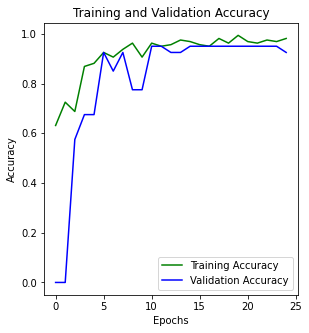

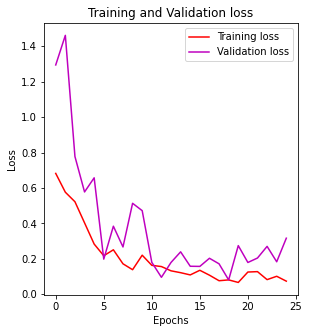

In [ ]:
accuracy1 = train1.history['accuracy']
val_accuracy1 = train1.history['val_accuracy']

loss1 = train1.history['loss']
val_loss1 = train1.history['val_loss']

epochs1 = range(len(accuracy1))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs1, accuracy1, 'g', label='Training Accuracy')
plt.plot(epochs1, val_accuracy1, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'm', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(x_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 0.0206 - accuracy: 1.0000


[0.020618943497538567, 1.0]

In [ ]:
pred1 = model1.predict(x_test) > 0.5
print(pred1)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]]


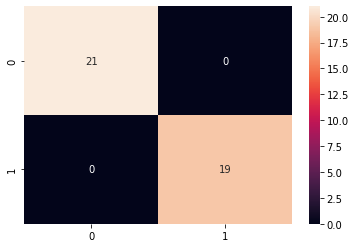

In [ ]:
import seaborn as sns
confusion_mat = confusion_matrix(pred, y_test)
sns.heatmap(confusion_mat, annot=True)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Adding the Resnet50 Model

In [ ]:
modelR50 = Sequential([
    tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='avg'),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
modelR50.layers[0].trainable = False

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
modelR50.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
modelR50.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                131136    
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 23,718,913
Trainable params: 131,201
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
trainR50 = modelR50.fit(x=x,
          y=y,
          batch_size=32,
          validation_split= 0.2,
          epochs=100,
          verbose=1    
        )

Epoch 1/100
5/5 [==============================] - 6s 652ms/step - loss: 0.6796 - accuracy: 0.5875 - val_loss: 0.9889 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 2s 352ms/step - loss: 0.6575 - accuracy: 0.6250 - val_loss: 1.0488 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 2s 356ms/step - loss: 0.6376 - accuracy: 0.6250 - val_loss: 0.8440 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 2s 354ms/step - loss: 0.6151 - accuracy: 0.6250 - val_loss: 0.9121 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 2s 355ms/step - loss: 0.6035 - accuracy: 0.6250 - val_loss: 0.7816 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 2s 355ms/step - loss: 0.5861 - accuracy: 0.6250 - val_loss: 0.9482 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 2s 356ms/step - loss: 0.5643 - accuracy: 0.6250 - val_loss: 0.7856 - val_accura

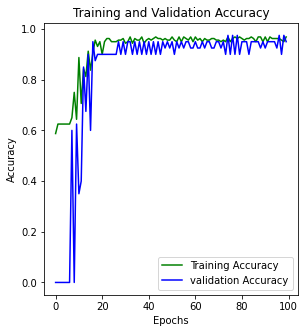

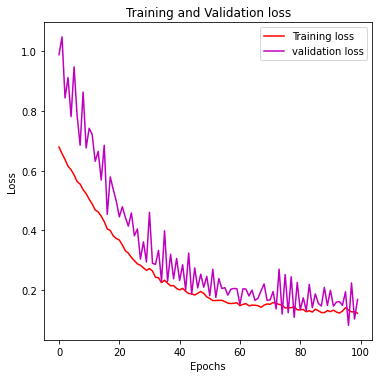

In [ ]:
acc_trainR50 = trainR50.history['accuracy']
acc_valR50 = trainR50.history['val_accuracy']

loss_trainR50 = trainR50.history['loss']
loss_valR50 = trainR50.history['val_loss']

epochsR50 = range(len(acc_trainR50))
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochsR50, acc_trainR50, 'g', label='Training Accuracy')
plt.plot(epochsR50, acc_valR50, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.tight_layout()
plt.plot(epochsR50, loss_trainR50, 'r', label='Training loss')
plt.plot(epochsR50, loss_valR50, 'm', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
modelR50.evaluate(x_test, y_test)

2/2 [==============================] - 0s 103ms/step - loss: 0.0798 - accuracy: 1.0000


[0.07981215417385101, 1.0]

In [ ]:
predR50 = modelR50.predict(x_test) > 0.5
print(pred)

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]]


In [ ]:
confusion_matR50 = confusion_matrix(predR50, y_test)

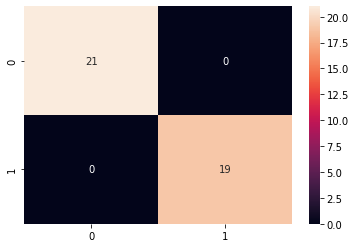

In [ ]:
import seaborn as sns
confusion_matR50 = confusion_matrix(predR50, y_test)
sns.heatmap(confusion_matR50, annot=True)

In [ ]:
print(classification_report(y_test, predR50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

